# Project 2020
<br>

#### Training regression models using Keras.  The author is Owen Coleman (G00387850@gmit.ie).
***

#### Overview

In this notebook you will find the two regression models that were used in the powerprod web service. These models were creating and trained using machine learning. I have also included explanations and some analysis of the accuracy of each of the models. 

#### Imports
Lets first import all the required libraries and configure our display options.

In [1]:
import numpy as np
import tensorflow.keras as kr
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [14, 8]

#### Powerproduction Dataset

Lets read the dataset into a pandas dataframe and display it with matplotlib. Before we do this we must first clean the dataset, removing a few instances where power values were recorded as zero toward the end of the dataset. 

The plot below shows our data with speed on the x axis and power on the y axis. We can see that it takes a particular amount of wind speed to activate any sort of real power generation from the turbines, from which point power geneation grows dramatically  with wind speed increase before leveling off at about 100KW/h.

In [2]:
df = pd.read_csv("powerproduction.csv")

In [3]:
#Remove the unreasonable power values
zeroVals = df[(df["speed"] > 10) & (df["power"] == 0)].index
df.drop(zeroVals, inplace=True)

Text(0, 0.5, 'Power Output')

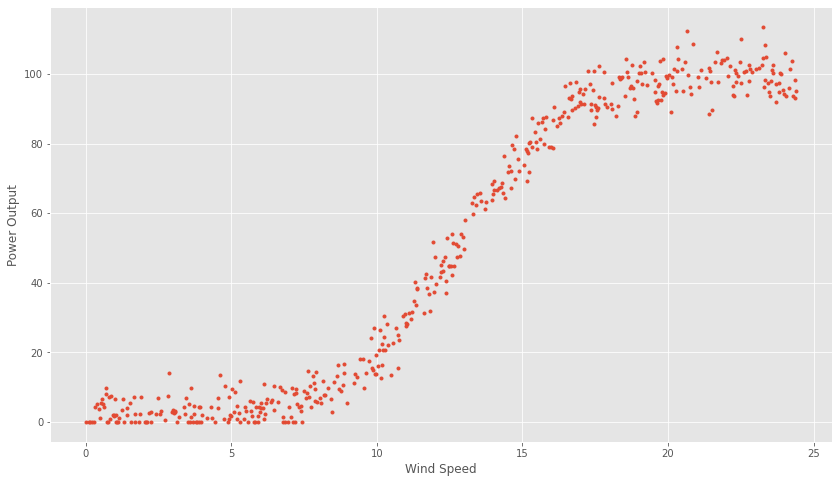

In [4]:
plt.plot(df["speed"], df["power"], '.')
# Add axis labels and a legend.
plt.xlabel('Wind Speed')
plt.ylabel('Power Output')

In [5]:
#storing speed and power in xy numpy arrays for ease of access.
x = np.array(df["speed"])
y = np.array(df["power"])

<br>

#### Linear Regression Model

We will be writing our regression models using the Keras python library[1](https://keras.io/). Keras is an open source software library that acts as an interface for the TensorFlow library, and overall makes machine learning much easier for beginners.

Lets first try to fit our data to a linear regression model. Below we create our neural network with the keras.Sequential[2](https://keras.io/api/models/sequential/) class. This is a general purpose class that allows us to move linearlly through the layers of our network. As we are performing simple linear regression, we need only a single layer with one neuron. We are using a Dense layer for this neural network, as it is the most common and frequently used layer[3](https://www.tutorialspoint.com/keras/keras_dense_layer.htm). Within this layer we provide the number of nuerons(1), the shape of our input (which is a single value x), our activation function and our *weight* and *bias* initializers. 

As we are essentially fitting a straight line to a database, we can use the following equation:

$$y = mx +c$$

In our neural network, our Dense layer with a linear activation does this computation for us, only here our *m* is our networks initial *weight* value and our *c* is the bias value. Next, we compile our model with the gradient descent method 'adam' and computing our loss as the *mean squared error*.


In [6]:
# Create our neural network with the sequential class. Code adapted from [8].
model = kr.models.Sequential()
#Add our layer with single nueron for y=wx+b calculation
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
#Compile with adam and MSE loss calculation.
model.compile('adam', loss='mean_squared_error')

In [7]:
# Train the neural network on our dataset. 1500 epochs.
history = model.fit(x, y, epochs=1500)

Epoch 1/1500
16/16 [==============================] - 0s 667us/step - loss: 2520.4695
Epoch 2/1500
16/16 [==============================] - 0s 733us/step - loss: 2548.1943
Epoch 3/1500
16/16 [==============================] - 0s 733us/step - loss: 2521.3985
Epoch 4/1500
16/16 [==============================] - 0s 867us/step - loss: 2449.9611
Epoch 5/1500
16/16 [==============================] - 0s 867us/step - loss: 2411.7760
Epoch 6/1500
16/16 [==============================] - 0s 800us/step - loss: 2535.2548
Epoch 7/1500
16/16 [==============================] - 0s 667us/step - loss: 2329.8103
Epoch 8/1500
16/16 [==============================] - 0s 733us/step - loss: 2442.5564
Epoch 9/1500
16/16 [==============================] - 0s 867us/step - loss: 2330.5262
Epoch 10/1500
16/16 [==============================] - 0s 734us/step - loss: 2349.6058
Epoch 11/1500
16/16 [==============================] - 0s 600us/step - loss: 2310.4580
Epoch 12/1500
16/16 [==============================]

16/16 [==============================] - 0s 600us/step - loss: 1031.8496
Epoch 96/1500
16/16 [==============================] - 0s 600us/step - loss: 1047.7169
Epoch 97/1500
16/16 [==============================] - 0s 600us/step - loss: 1052.4086
Epoch 98/1500
16/16 [==============================] - 0s 600us/step - loss: 1050.7407
Epoch 99/1500
16/16 [==============================] - 0s 667us/step - loss: 1078.6271
Epoch 100/1500
16/16 [==============================] - 0s 600us/step - loss: 1071.0332
Epoch 101/1500
16/16 [==============================] - 0s 533us/step - loss: 1005.6180
Epoch 102/1500
16/16 [==============================] - 0s 600us/step - loss: 1053.2136
Epoch 103/1500
16/16 [==============================] - 0s 533us/step - loss: 991.4806
Epoch 104/1500
16/16 [==============================] - 0s 533us/step - loss: 997.0124
Epoch 105/1500
16/16 [==============================] - 0s 600us/step - loss: 884.9029
Epoch 106/1500
16/16 [==============================] 

16/16 [==============================] - 0s 600us/step - loss: 483.4376
Epoch 190/1500
16/16 [==============================] - 0s 600us/step - loss: 442.1267
Epoch 191/1500
16/16 [==============================] - 0s 533us/step - loss: 456.8879
Epoch 192/1500
16/16 [==============================] - 0s 467us/step - loss: 421.3085
Epoch 193/1500
16/16 [==============================] - 0s 600us/step - loss: 443.0069
Epoch 194/1500
16/16 [==============================] - 0s 533us/step - loss: 443.2564
Epoch 195/1500
16/16 [==============================] - 0s 533us/step - loss: 440.4510
Epoch 196/1500
16/16 [==============================] - 0s 533us/step - loss: 407.2316
Epoch 197/1500
16/16 [==============================] - 0s 600us/step - loss: 426.7563
Epoch 198/1500
16/16 [==============================] - 0s 533us/step - loss: 426.5757
Epoch 199/1500
16/16 [==============================] - 0s 533us/step - loss: 402.3768
Epoch 200/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 533us/step - loss: 301.3477
Epoch 284/1500
16/16 [==============================] - 0s 533us/step - loss: 289.7607
Epoch 285/1500
16/16 [==============================] - 0s 533us/step - loss: 291.4423
Epoch 286/1500
16/16 [==============================] - 0s 533us/step - loss: 285.4685
Epoch 287/1500
16/16 [==============================] - 0s 600us/step - loss: 298.0567
Epoch 288/1500
16/16 [==============================] - 0s 600us/step - loss: 290.8196
Epoch 289/1500
16/16 [==============================] - 0s 533us/step - loss: 296.7815
Epoch 290/1500
16/16 [==============================] - 0s 600us/step - loss: 281.1977
Epoch 291/1500
16/16 [==============================] - 0s 600us/step - loss: 273.3134
Epoch 292/1500
16/16 [==============================] - 0s 533us/step - loss: 286.0969
Epoch 293/1500
16/16 [==============================] - 0s 533us/step - loss: 298.0762
Epoch 294/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 533us/step - loss: 268.8674
Epoch 377/1500
16/16 [==============================] - 0s 467us/step - loss: 272.0027
Epoch 378/1500
16/16 [==============================] - 0s 600us/step - loss: 262.3055
Epoch 379/1500
16/16 [==============================] - 0s 667us/step - loss: 258.0619
Epoch 380/1500
16/16 [==============================] - 0s 600us/step - loss: 264.0694
Epoch 381/1500
16/16 [==============================] - 0s 533us/step - loss: 269.3441
Epoch 382/1500
16/16 [==============================] - 0s 600us/step - loss: 277.1526
Epoch 383/1500
16/16 [==============================] - 0s 600us/step - loss: 284.5601
Epoch 384/1500
16/16 [==============================] - 0s 600us/step - loss: 262.6570
Epoch 385/1500
16/16 [==============================] - 0s 734us/step - loss: 275.3797
Epoch 386/1500
16/16 [==============================] - 0s 734us/step - loss: 270.5930
Epoch 387/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 600us/step - loss: 254.3564
Epoch 471/1500
16/16 [==============================] - 0s 867us/step - loss: 256.3457
Epoch 472/1500
16/16 [==============================] - 0s 867us/step - loss: 269.4700
Epoch 473/1500
16/16 [==============================] - 0s 734us/step - loss: 255.8383
Epoch 474/1500
16/16 [==============================] - 0s 667us/step - loss: 281.1757
Epoch 475/1500
16/16 [==============================] - 0s 733us/step - loss: 246.7887
Epoch 476/1500
16/16 [==============================] - 0s 667us/step - loss: 257.8494
Epoch 477/1500
16/16 [==============================] - 0s 667us/step - loss: 258.5028
Epoch 478/1500
16/16 [==============================] - 0s 667us/step - loss: 271.8902
Epoch 479/1500
16/16 [==============================] - 0s 667us/step - loss: 254.4258
Epoch 480/1500
16/16 [==============================] - 0s 800us/step - loss: 246.7747
Epoch 481/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 533us/step - loss: 248.1539
Epoch 565/1500
16/16 [==============================] - 0s 600us/step - loss: 252.7426
Epoch 566/1500
16/16 [==============================] - 0s 667us/step - loss: 260.4561
Epoch 567/1500
16/16 [==============================] - 0s 533us/step - loss: 245.9545
Epoch 568/1500
16/16 [==============================] - 0s 600us/step - loss: 246.7193
Epoch 569/1500
16/16 [==============================] - 0s 600us/step - loss: 233.5033
Epoch 570/1500
16/16 [==============================] - 0s 800us/step - loss: 240.6379
Epoch 571/1500
16/16 [==============================] - ETA: 0s - loss: 238.705 - 0s 667us/step - loss: 245.8406
Epoch 572/1500
16/16 [==============================] - 0s 600us/step - loss: 236.7739
Epoch 573/1500
16/16 [==============================] - 0s 667us/step - loss: 254.0934
Epoch 574/1500
16/16 [==============================] - 0s 667us/step - loss: 246.3567
Epoch 575/1500
16/16 [==========

16/16 [==============================] - 0s 667us/step - loss: 239.6537
Epoch 659/1500
16/16 [==============================] - 0s 600us/step - loss: 235.5690
Epoch 660/1500
16/16 [==============================] - 0s 800us/step - loss: 241.0662
Epoch 661/1500
16/16 [==============================] - 0s 667us/step - loss: 240.8232
Epoch 662/1500
16/16 [==============================] - 0s 667us/step - loss: 237.7327
Epoch 663/1500
16/16 [==============================] - 0s 533us/step - loss: 245.1315
Epoch 664/1500
16/16 [==============================] - 0s 533us/step - loss: 229.2957
Epoch 665/1500
16/16 [==============================] - 0s 600us/step - loss: 232.1497
Epoch 666/1500
16/16 [==============================] - 0s 533us/step - loss: 239.1641
Epoch 667/1500
16/16 [==============================] - 0s 533us/step - loss: 232.2287
Epoch 668/1500
16/16 [==============================] - 0s 533us/step - loss: 234.8253
Epoch 669/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 600us/step - loss: 225.9854
Epoch 752/1500
16/16 [==============================] - 0s 467us/step - loss: 244.2307
Epoch 753/1500
16/16 [==============================] - 0s 600us/step - loss: 228.9355
Epoch 754/1500
16/16 [==============================] - 0s 867us/step - loss: 234.4913
Epoch 755/1500
16/16 [==============================] - 0s 667us/step - loss: 231.3909
Epoch 756/1500
16/16 [==============================] - 0s 800us/step - loss: 225.2610
Epoch 757/1500
16/16 [==============================] - 0s 733us/step - loss: 232.7734
Epoch 758/1500
16/16 [==============================] - 0s 733us/step - loss: 228.7559
Epoch 759/1500
16/16 [==============================] - 0s 867us/step - loss: 218.2513
Epoch 760/1500
16/16 [==============================] - 0s 1ms/step - loss: 217.4980
Epoch 761/1500
16/16 [==============================] - 0s 867us/step - loss: 231.4799
Epoch 762/1500
16/16 [==============================] - 0s 9

16/16 [==============================] - 0s 533us/step - loss: 208.4953
Epoch 846/1500
16/16 [==============================] - 0s 600us/step - loss: 214.5607
Epoch 847/1500
16/16 [==============================] - 0s 600us/step - loss: 213.0787
Epoch 848/1500
16/16 [==============================] - 0s 667us/step - loss: 215.3648
Epoch 849/1500
16/16 [==============================] - 0s 600us/step - loss: 222.0908
Epoch 850/1500
16/16 [==============================] - 0s 533us/step - loss: 224.6958
Epoch 851/1500
16/16 [==============================] - 0s 467us/step - loss: 200.1267
Epoch 852/1500
16/16 [==============================] - 0s 533us/step - loss: 214.8346
Epoch 853/1500
16/16 [==============================] - 0s 533us/step - loss: 210.2014
Epoch 854/1500
16/16 [==============================] - 0s 600us/step - loss: 232.4374
Epoch 855/1500
16/16 [==============================] - 0s 600us/step - loss: 211.2707
Epoch 856/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 600us/step - loss: 200.3507
Epoch 939/1500
16/16 [==============================] - 0s 533us/step - loss: 209.0829
Epoch 940/1500
16/16 [==============================] - 0s 600us/step - loss: 204.9459
Epoch 941/1500
16/16 [==============================] - 0s 667us/step - loss: 192.1327
Epoch 942/1500
16/16 [==============================] - 0s 600us/step - loss: 197.2756
Epoch 943/1500
16/16 [==============================] - 0s 533us/step - loss: 220.8373
Epoch 944/1500
16/16 [==============================] - 0s 533us/step - loss: 215.7872
Epoch 945/1500
16/16 [==============================] - 0s 467us/step - loss: 206.3574
Epoch 946/1500
16/16 [==============================] - 0s 533us/step - loss: 214.8982
Epoch 947/1500
16/16 [==============================] - 0s 533us/step - loss: 222.5589
Epoch 948/1500
16/16 [==============================] - 0s 533us/step - loss: 206.4230
Epoch 949/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 667us/step - loss: 201.2501
Epoch 1032/1500
16/16 [==============================] - 0s 667us/step - loss: 202.4661
Epoch 1033/1500
16/16 [==============================] - 0s 600us/step - loss: 194.8703
Epoch 1034/1500
16/16 [==============================] - 0s 667us/step - loss: 200.3988
Epoch 1035/1500
16/16 [==============================] - 0s 667us/step - loss: 220.3997
Epoch 1036/1500
16/16 [==============================] - 0s 667us/step - loss: 206.2852
Epoch 1037/1500
16/16 [==============================] - 0s 600us/step - loss: 198.2106
Epoch 1038/1500
16/16 [==============================] - 0s 867us/step - loss: 203.8919
Epoch 1039/1500
16/16 [==============================] - 0s 533us/step - loss: 208.0647
Epoch 1040/1500
16/16 [==============================] - 0s 467us/step - loss: 198.7717
Epoch 1041/1500
16/16 [==============================] - 0s 667us/step - loss: 202.9867
Epoch 1042/1500
16/16 [=========================

16/16 [==============================] - 0s 667us/step - loss: 196.9487
Epoch 1125/1500
16/16 [==============================] - 0s 733us/step - loss: 190.9944
Epoch 1126/1500
16/16 [==============================] - 0s 800us/step - loss: 191.0758
Epoch 1127/1500
16/16 [==============================] - 0s 867us/step - loss: 195.5912
Epoch 1128/1500
16/16 [==============================] - 0s 600us/step - loss: 195.9261
Epoch 1129/1500
16/16 [==============================] - 0s 667us/step - loss: 196.0163
Epoch 1130/1500
16/16 [==============================] - 0s 667us/step - loss: 197.3657
Epoch 1131/1500
16/16 [==============================] - 0s 533us/step - loss: 211.9686
Epoch 1132/1500
16/16 [==============================] - 0s 600us/step - loss: 196.3750
Epoch 1133/1500
16/16 [==============================] - 0s 600us/step - loss: 211.7054
Epoch 1134/1500
16/16 [==============================] - 0s 600us/step - loss: 210.9473
Epoch 1135/1500
16/16 [=========================

16/16 [==============================] - 0s 667us/step - loss: 196.3399
Epoch 1217/1500
16/16 [==============================] - 0s 733us/step - loss: 202.4193
Epoch 1218/1500
16/16 [==============================] - 0s 600us/step - loss: 186.2393
Epoch 1219/1500
16/16 [==============================] - 0s 600us/step - loss: 190.1682
Epoch 1220/1500
16/16 [==============================] - 0s 600us/step - loss: 185.6820
Epoch 1221/1500
16/16 [==============================] - 0s 600us/step - loss: 195.7401
Epoch 1222/1500
16/16 [==============================] - 0s 600us/step - loss: 184.5714
Epoch 1223/1500
16/16 [==============================] - 0s 667us/step - loss: 206.6757
Epoch 1224/1500
16/16 [==============================] - 0s 600us/step - loss: 210.8685
Epoch 1225/1500
16/16 [==============================] - 0s 600us/step - loss: 186.1397
Epoch 1226/1500
16/16 [==============================] - 0s 533us/step - loss: 205.3154
Epoch 1227/1500
16/16 [=========================

Epoch 1309/1500
16/16 [==============================] - 0s 600us/step - loss: 187.6788
Epoch 1310/1500
16/16 [==============================] - 0s 667us/step - loss: 175.3341
Epoch 1311/1500
16/16 [==============================] - 0s 600us/step - loss: 184.4296
Epoch 1312/1500
16/16 [==============================] - 0s 600us/step - loss: 183.1153
Epoch 1313/1500
16/16 [==============================] - 0s 533us/step - loss: 174.2946
Epoch 1314/1500
16/16 [==============================] - 0s 600us/step - loss: 184.3837
Epoch 1315/1500
16/16 [==============================] - 0s 600us/step - loss: 177.0190
Epoch 1316/1500
16/16 [==============================] - 0s 533us/step - loss: 179.1280
Epoch 1317/1500
16/16 [==============================] - 0s 600us/step - loss: 189.4124
Epoch 1318/1500
16/16 [==============================] - 0s 600us/step - loss: 178.7566
Epoch 1319/1500
16/16 [==============================] - 0s 600us/step - loss: 175.9551
Epoch 1320/1500
16/16 [=========

16/16 [==============================] - 0s 533us/step - loss: 184.7064
Epoch 1402/1500
16/16 [==============================] - 0s 600us/step - loss: 193.0250
Epoch 1403/1500
16/16 [==============================] - 0s 533us/step - loss: 178.1780
Epoch 1404/1500
16/16 [==============================] - 0s 600us/step - loss: 176.3615
Epoch 1405/1500
16/16 [==============================] - 0s 533us/step - loss: 190.5934
Epoch 1406/1500
16/16 [==============================] - 0s 600us/step - loss: 177.3809
Epoch 1407/1500
16/16 [==============================] - 0s 600us/step - loss: 182.2935
Epoch 1408/1500
16/16 [==============================] - 0s 533us/step - loss: 188.1682
Epoch 1409/1500
16/16 [==============================] - 0s 600us/step - loss: 181.5166
Epoch 1410/1500
16/16 [==============================] - 0s 667us/step - loss: 184.7248
Epoch 1411/1500
16/16 [==============================] - 0s 667us/step - loss: 186.6340
Epoch 1412/1500
16/16 [=========================

16/16 [==============================] - 0s 533us/step - loss: 186.7209
Epoch 1494/1500
16/16 [==============================] - 0s 600us/step - loss: 176.1010
Epoch 1495/1500
16/16 [==============================] - 0s 667us/step - loss: 179.4840
Epoch 1496/1500
16/16 [==============================] - 0s 600us/step - loss: 184.4464
Epoch 1497/1500
16/16 [==============================] - 0s 600us/step - loss: 173.4600
Epoch 1498/1500
16/16 [==============================] - 0s 600us/step - loss: 184.4525
Epoch 1499/1500
16/16 [==============================] - 0s 600us/step - loss: 174.0649
Epoch 1500/1500
16/16 [==============================] - 0s 600us/step - loss: 179.8410


<br>

#### Analysis

As mentioned above our compiler uses *mean squared error* (MSE) as our estimator of fit[4](https://en.wikipedia.org/wiki/Mean_squared_error). *Mean squared error* is found using the following calculation:

$$MSE = \frac {1}{n} \sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}. $$

The above equation measures the average of the squares of errors, aka the average squared difference between predicted values for *y* and the actual values for y. As our neural network runs, it computes the above equation in an effort to maximize performance. Maximizing performance in this case would be finding values for the regression coefficients (weight & bias) that minimise the MSE[5](https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/). 

Below is a plot showing our *mean squared error* decreasing as our neural network finds the ideal regression line.

Text(0, 0.5, 'Epochs')

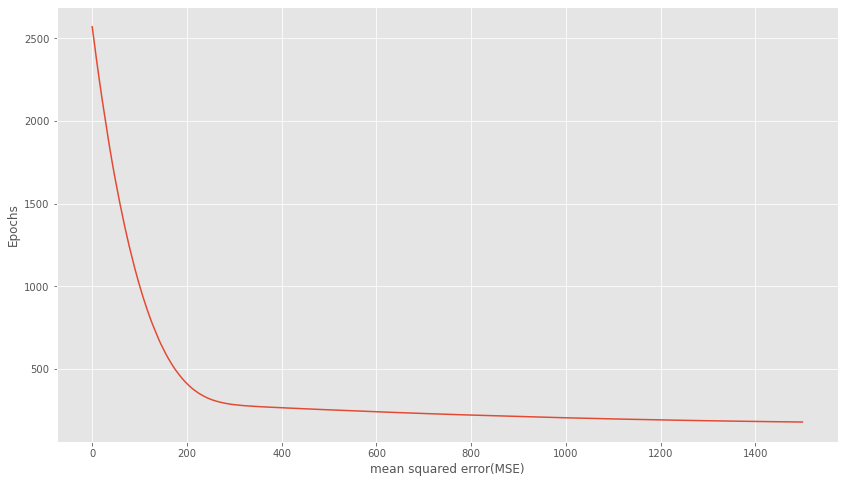

In [8]:
#plotting our MSE loss value over the runtime of our NN.
plt.plot(history.history['loss'])
plt.xlabel('mean squared error(MSE)')
plt.ylabel('Epochs')

In [32]:
print("\nFinal Mean Squared Error (MSE) value: %5.3f" % model.evaluate(x,y))

16/16 [==============================] - 0s 467us/step - loss: 16.9851

Final Mean Squared Error (MSE) value: 16.985


Below we can see our linear regression line overlayed on our dataset. While not a terrible choice of fit the data does diverge heavily from our line at certain points. Lets see if we can get some predictions in any of these areas. 

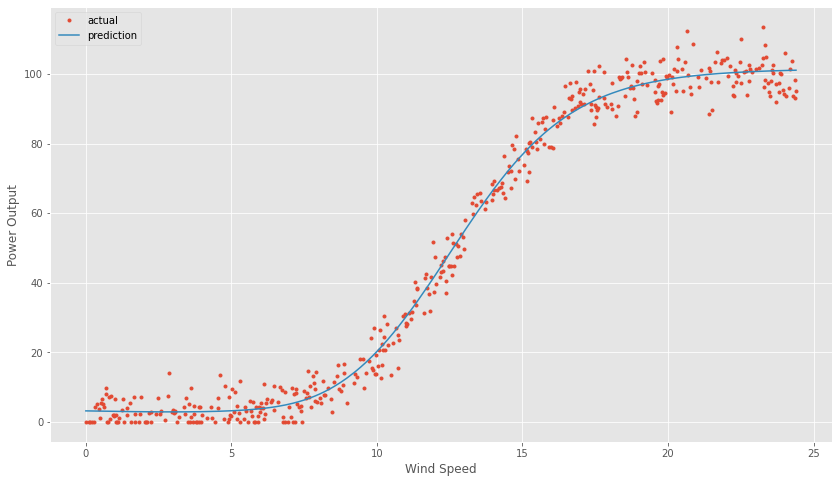

In [35]:
plt.plot(x, y, '.',label='actual' )
plt.plot(x, model.predict(x), label='prediction')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output')
plt.legend()

At the 10th row of the dataframe, we see the speed is 0.55km/h and our power output is 6.49Kw/h.

In [11]:
df.loc[10]

speed    0.551
power    6.498
Name: 10, dtype: float64

When passed into our model at the same speed we get a prediction of -8.58KW/h

In [12]:
model.predict([0.551])

array([[-8.595417]], dtype=float32)

Similarly, when the speed is 9.20km/h we can expect a power output of 11.12KW/h.

In [13]:
df.loc[180]

speed     9.209
power    11.120
Name: 180, dtype: float64

But when we pass this wind speed value into our model we get a value of 35.49KW/h.

In [14]:
model.predict([9.209])

array([[35.422276]], dtype=float32)

In [15]:
print("Here are the coefficients of our model: m =%5.2f and c = %5.2f:" % (model.get_weights()[0][0][0], model.get_weights()[1][0]))

Here are the coefficients of our model: m = 5.08 and c = -11.40:


<br>

#### Polynomial regression model

For our next model we will perform nonlinear regression as our dataset appears curvilinear. Our model will still be sequential but this time we will have a hidden layer consisting of 30 neurons each using the sigmoid activation function. Sigmoid activation was chosen as our data appears to follow a logistic growth curve which is the characteristic S shape trend that can be observed in the data[6](https://en.wikipedia.org/wiki/Sigmoid_function),[7](https://en.wikipedia.org/wiki/Logistic_function). The sigmoid/logistic function is computed as follows: 

$$f(x)={\frac {1}{1+e^{-x}}}$$

As the sigmoid function can only provide us with values between 0 and 1 for each neuron, we must add an additional Dense layer with a linear activation function. This is the output layer that scales our regression model to our dataset. It returns only a single value, our predicted *y* value. Our *weight* and *bias* are left as the default on both these layers. We compile this model in a largely similar manner, using the same *mean squared error* calculation. The only difference being that we specificy a slower learning rate to Adam to help increase the accuracy of our fit. 

Finally, we fit the data over 300 epochs, using a batch_size of 5. Specifiying a batch size can help to increase our accuracy further.

(Note: I chose to use 30 neurons for my hidden layer, which proved to be more than enough when fitting the model on the dataset.)

In [16]:
# # Create our neural network with the sequential class. Code adapted from [8].
model = kr.models.Sequential()
#Add Dense layer with 50 neurons, sigmoidal activation.
model.add(kr.layers.Dense(30, input_shape=(1,), activation='sigmoid'))
#Linear activation output layer to fit model to dataset.
model.add(kr.layers.Dense(1, activation='linear'))
#Compile with MSE + low learning rate.
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [17]:
# Fit the data.
history = model.fit(x, y, epochs=300, batch_size=5)

Epoch 1/300
98/98 [==============================] - 0s 670us/step - loss: 3958.1147
Epoch 2/300
98/98 [==============================] - 0s 639us/step - loss: 3871.2386
Epoch 3/300
98/98 [==============================] - 0s 557us/step - loss: 3865.6914
Epoch 4/300
98/98 [==============================] - 0s 753us/step - loss: 3420.3466
Epoch 5/300
98/98 [==============================] - 0s 773us/step - loss: 3067.7627
Epoch 6/300
98/98 [==============================] - 0s 536us/step - loss: 2899.9753
Epoch 7/300
98/98 [==============================] - 0s 515us/step - loss: 2997.8744
Epoch 8/300
98/98 [==============================] - 0s 474us/step - loss: 2880.3845
Epoch 9/300
98/98 [==============================] - 0s 464us/step - loss: 2530.5233
Epoch 10/300
98/98 [==============================] - 0s 433us/step - loss: 2757.2005
Epoch 11/300
98/98 [==============================] - 0s 454us/step - loss: 2357.4952
Epoch 12/300
98/98 [==============================] - 0s 443us/

98/98 [==============================] - 0s 433us/step - loss: 48.5506
Epoch 98/300
98/98 [==============================] - 0s 464us/step - loss: 47.7865
Epoch 99/300
98/98 [==============================] - 0s 433us/step - loss: 41.3771
Epoch 100/300
98/98 [==============================] - 0s 495us/step - loss: 44.9954
Epoch 101/300
98/98 [==============================] - 0s 423us/step - loss: 42.5619
Epoch 102/300
98/98 [==============================] - 0s 423us/step - loss: 44.3123
Epoch 103/300
98/98 [==============================] - 0s 443us/step - loss: 42.4348
Epoch 104/300
98/98 [==============================] - 0s 433us/step - loss: 40.7244
Epoch 105/300
98/98 [==============================] - 0s 423us/step - loss: 40.2895
Epoch 106/300
98/98 [==============================] - 0s 443us/step - loss: 39.5961
Epoch 107/300
98/98 [==============================] - 0s 433us/step - loss: 40.7230
Epoch 108/300
98/98 [==============================] - 0s 433us/step - loss: 36.4

98/98 [==============================] - 0s 433us/step - loss: 20.3896
Epoch 194/300
98/98 [==============================] - 0s 443us/step - loss: 20.2653
Epoch 195/300
98/98 [==============================] - 0s 423us/step - loss: 22.2000
Epoch 196/300
98/98 [==============================] - 0s 443us/step - loss: 19.2461
Epoch 197/300
98/98 [==============================] - 0s 433us/step - loss: 20.1272
Epoch 198/300
98/98 [==============================] - 0s 433us/step - loss: 19.1923
Epoch 199/300
98/98 [==============================] - 0s 443us/step - loss: 17.9595
Epoch 200/300
98/98 [==============================] - 0s 433us/step - loss: 18.4936
Epoch 201/300
98/98 [==============================] - 0s 474us/step - loss: 17.8929
Epoch 202/300
98/98 [==============================] - 0s 433us/step - loss: 17.9577
Epoch 203/300
98/98 [==============================] - 0s 412us/step - loss: 17.1051
Epoch 204/300
98/98 [==============================] - 0s 443us/step - loss: 20

98/98 [==============================] - 0s 433us/step - loss: 15.6011
Epoch 290/300
98/98 [==============================] - 0s 454us/step - loss: 16.5871
Epoch 291/300
98/98 [==============================] - 0s 443us/step - loss: 16.1015
Epoch 292/300
98/98 [==============================] - 0s 443us/step - loss: 18.3048
Epoch 293/300
98/98 [==============================] - 0s 443us/step - loss: 17.4029
Epoch 294/300
98/98 [==============================] - 0s 423us/step - loss: 15.4189
Epoch 295/300
98/98 [==============================] - 0s 433us/step - loss: 17.8979
Epoch 296/300
98/98 [==============================] - 0s 515us/step - loss: 17.3280
Epoch 297/300
98/98 [==============================] - 0s 433us/step - loss: 17.0501
Epoch 298/300
98/98 [==============================] - 0s 433us/step - loss: 19.5576
Epoch 299/300
98/98 [==============================] - 0s 454us/step - loss: 16.9644
Epoch 300/300
98/98 [==============================] - 0s 454us/step - loss: 17

<br>

#### Analysis
Below we see our regression model on our dataset. From initial observations it looks like an excellent fit. 

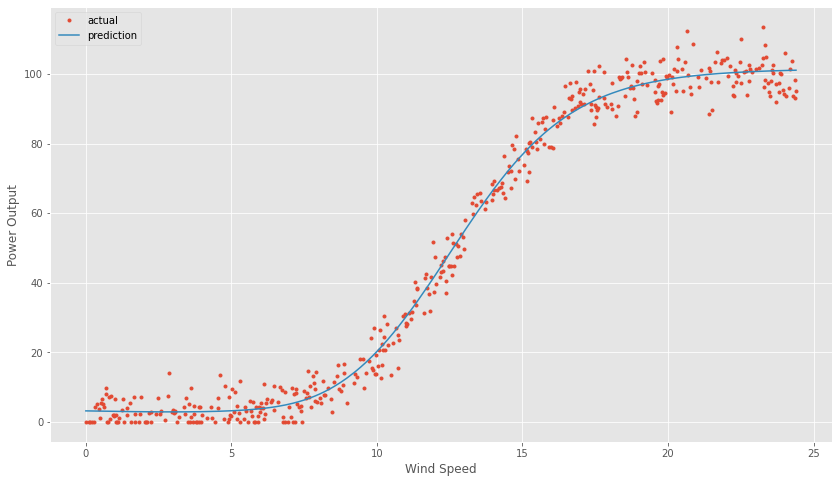

In [34]:
plt.plot(x,y,'.',label='actual' )
plt.plot(x, model.predict(x),label='prediction' )
plt.xlabel('Wind Speed')
plt.ylabel('Power Output')
plt.legend()

Here is our plot of the MSE over the course of the curve fitting process, note that by the end of 300th epoch our loss value reaches to values as low as the high teens. 

Text(0, 0.5, 'Epochs')

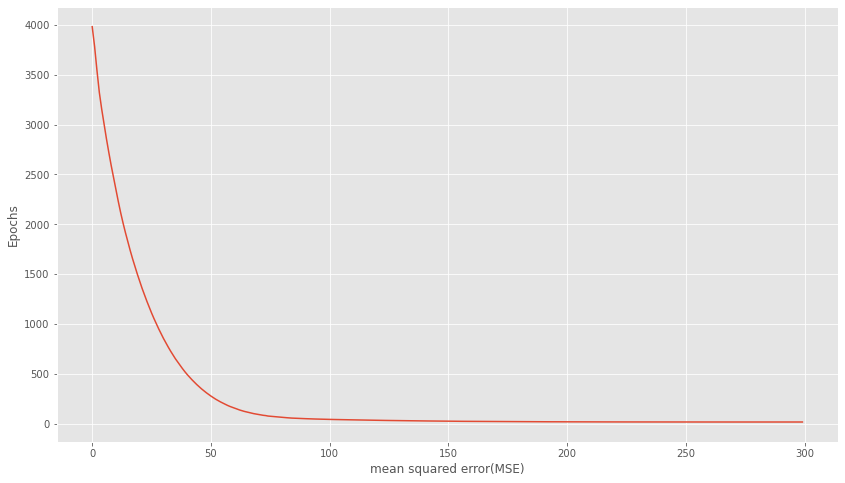

In [18]:
#plotting our MSE loss value over the runtime of our NN.
plt.plot(history.history['loss'])
plt.xlabel('mean squared error(MSE)')
plt.ylabel('Epochs')

In [36]:
print("\nFinal Mean Squared Error (MSE) value: %5.3f" % model.evaluate(x,y))

16/16 [==============================] - 0s 467us/step - loss: 16.9851

Final Mean Squared Error (MSE) value: 16.985


Finally, lets look at some predictions that we get as *power* values when we give the model different wind speeds. Below are three randomly selected rows from our dataframe, the speed values from these rows are passed into our model. As we can see in all three of the examples our prediction values are highly accurate being only a Kilowatt away at max. 

In [110]:
[df.loc[5],"",df.loc[230],"",df.loc[450]]

[speed    0.325
 power    4.331
 Name: 5, dtype: float64,
 '',
 speed    11.737
 power    38.552
 Name: 230, dtype: float64,
 '',
 speed     22.673
 power    100.698
 Name: 450, dtype: float64]

In [135]:
print("Predicted power when speed is %5.3fkm/h: %5.3fKW/h" % (df.loc[5][0], model.predict([df.loc[5][0]])))
print("ACTUAL: %5.3fKW/h" % df.loc[5][1])
print("\nPredicted power when speed is %5.3fkm/h: %5.3fKW/h" % (df.loc[230][0], model.predict([df.loc[230][0]])))
print("ACTUAL: %5.3fKW/h" % df.loc[230][1])
print("\nPredicted power when speed is %5.3fkm/h: %5.3fKW/h" % (df.loc[450][0], model.predict([df.loc[450][0]])))
print("ACTUAL: %5.3fKW/h" % df.loc[450][1])

Predicted power when speed is 0.325km/h: 3.155KW/h
ACTUAL: 4.331KW/h

Predicted power when speed is 11.737km/h: 38.870KW/h
ACTUAL: 38.552KW/h

Predicted power when speed is 22.673km/h: 100.566KW/h
ACTUAL: 100.698KW/h


<br>

#### Summary

While our linear model achieved the close to the best fit it could, it proved to be unsuitable in its prediction accuracy. The polynomial model on the other hand appears much more reliable at accurately predicting power regardless of windspeed. While both models will be utilized in the powerprod web service, our polynomial model is the clear winner in terms of returning accurate values. 

***
# Sources

[1] Keras library, https://keras.io/

[2] Keras, Keras Documentation, The Sequential class https://keras.io/api/models/sequential/

[3] tutorialspoint, Keras - Dense Layer, https://www.tutorialspoint.com/keras/keras_dense_layer.htm

[4] Wikipedia, Mean squared error, https://en.wikipedia.org/wiki/Mean_squared_error

[5] freeCodeCamp, Machine learning: an introduction to mean squared error and regression lines, Moshe Binieli, https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/

[6] Wikipedia, Sigmoid Function, https://en.wikipedia.org/wiki/Sigmoid_function

[7] Wikipedia, Logistic Function, https://en.wikipedia.org/wiki/Logistic_function

[8] GitHub, Linear regression in keras, Ian McLoughlin, https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-linear.ipynb


***
# End